# Day 4

## Part 1

- `@`s are rolls of paper
- `@`s are only accessible if <4/8 adjacent spaces are filled (locations outside the rid count as full)
- the solution is how many `@`s can be accessed.

In [1]:
from copy import deepcopy
from dataclasses import dataclass
import logging
from matplotlib import pyplot as plt
from pathlib import Path

from tqdm import tqdm

from advent_of_code_utils.advent_of_code_utils import (
    parse_from_file,
    ParseConfig as PC,
    markdown,
    plot_str_grid,
    Point2,
)

log = logging.getLogger("advent")
logging.basicConfig(level=logging.INFO)


parser = PC("\n", PC("", str))
grid = parse_from_file(Path("day_4.txt"), parser)

INFO:advent_of_code_utils.py:139 items loaded from "day_4.txt"


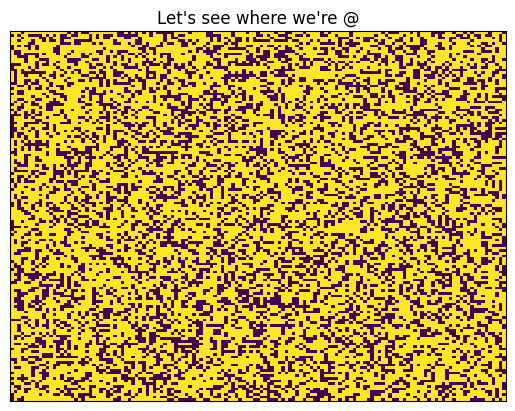

In [2]:
fig, ax = plt.subplots()
ax.set_title("Let's see where we're @")
plot_str_grid(grid, ax)

In [3]:
# so I think we need a few things:
# a function that returns valid grid locations
# ended up adding a new func to Point2 for this - adjacent8()

def get_adjacent(point: Point2) -> list[Point2]:
    """returns valid grid positions"""
    max_line = len(grid) - 1
    max_col = len(grid[0]) - 1
    adjacent = []
    for adj_point in point.adjacent8():
        line = adj_point.l

        # vertical bounds
        if line < 0 or line > max_line:
            continue

        col = adj_point.c

        # horz bounds
        if col < 0 or col > max_col:
            continue

        # ...else
        adjacent.append(adj_point)
    return adjacent

point = Point2(0, 0)
log.info(f"{point=}, {get_adjacent(point)=}")

point = Point2(1, 1)
log.info(f"{point=}, {get_adjacent(point)=}")

INFO:advent:point=(0, 0), get_adjacent(point)=[(1, 1), (0, 1), (1, 0)]
INFO:advent:point=(1, 1), get_adjacent(point)=[(0, 0), (0, 2), (2, 2), (2, 0), (0, 1), (1, 2), (2, 1), (1, 0)]


In [4]:
# great now we just have t count the ones that have @s in them
marked_grid = deepcopy(grid)
roll = "@"
accessable = 0

for l, line in enumerate(grid):
    for c, value in enumerate(line):
        if grid[l][c] != roll:
            continue

        point = Point2(l, c)
        roll_count = 0

        for adj_point in get_adjacent(point):
            if grid[adj_point.l][adj_point.c] == roll:
                roll_count += 1
        
        if roll_count < 4:
            marked_grid[adj_point.l][adj_point.c] = "x"
            accessable += 1

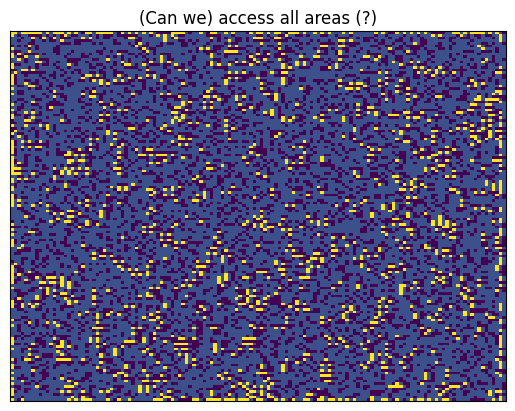

In [5]:
fig, ax = plt.subplots()
ax.set_title("(Can we) access all areas (?)")
plot_str_grid(marked_grid, ax)

In [6]:
log.info(f"There are {accessable} accessible rolls!")

INFO:advent:There are 1587 accessible rolls!


## Part 2

- same deal but keep iterating until no more rolls can be accessed

In [7]:
# ended up having to debug so I used the example first
grid = parse_from_file("day_4_example.txt", parser)

marked_grids = [deepcopy(grid)]
accessable = [0]
last_accessible = None
current_accessible = 0
roll = "@"

# keep going until we check and can't find any more acessible rolls
while last_accessible != current_accessible:
    log.info(f"{current_accessible=}")
    last_accessible = current_accessible
    # copy the most recent grid
    current_grid = deepcopy(marked_grids[-1])

    # then copy again
    marked_grid = deepcopy(marked_grids[-1])

    for l, line in enumerate(current_grid):
        for c, value in enumerate(line):
            if current_grid[l][c] != roll:
                continue

            point = Point2(l, c)
            roll_count = 0

            for adj_point in get_adjacent(point):
                if current_grid[adj_point.l][adj_point.c] == roll:
                    roll_count += 1
            
            if roll_count < 4:
                marked_grid[point.l][point.c] = "x"
                current_accessible += 1
    
    marked_grids.append(marked_grid)
    accessable.append(current_accessible)

INFO:advent_of_code_utils.py:10 items loaded from "day_4_example.txt"
INFO:advent:current_accessible=0
INFO:advent:current_accessible=13
INFO:advent:current_accessible=25
INFO:advent:current_accessible=32
INFO:advent:current_accessible=37
INFO:advent:current_accessible=39
INFO:advent:current_accessible=40
INFO:advent:current_accessible=41
INFO:advent:current_accessible=42
INFO:advent:current_accessible=43


INFO:advent_of_code_utils.py:Creating 11 frame images using "plot_str_grid()"
generating frames: 100%|██████████| 11/11 [00:00<00:00, 14.72it/s]
INFO:advent_of_code_utils.py:11 images saved to "img_temp"
INFO:advent_of_code_utils.py:Creating "day_4_example.gif" with frame duration 500ms, repeat=True
INFO:advent_of_code_utils.py:"day_4_example.gif" saved!
INFO:advent_of_code_utils.py:"img_temp" cleaned up
INFO:advent_of_code_utils.py:Embedding "day_4_example.gif"


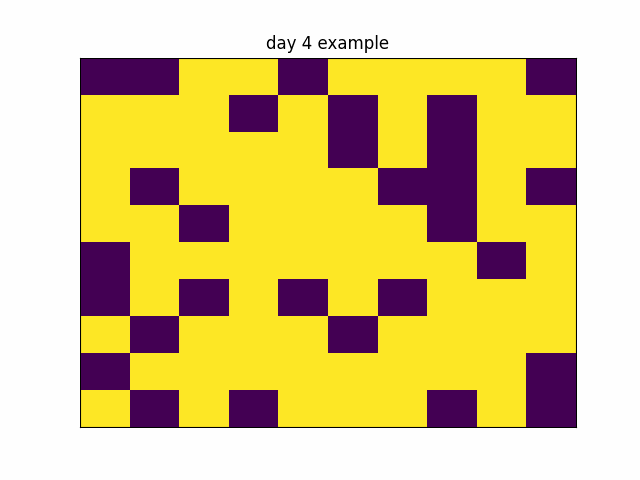

In [8]:
from advent_of_code_utils.advent_of_code_utils import (
    create_gif,
    embed_image,
)

gif_path = create_gif(
    marked_grids,
    plot_str_grid,
    Path("day_4_example.gif"),
    frame_duration_ms=500,
    title="day 4 example"
)

embed_image(gif_path)

In [9]:
# lets solve for real!
grid = parse_from_file("day_4.txt", parser)

marked_grids = [deepcopy(grid)]
accessable = [0]
last_accessible = None
current_accessible = 0
roll = "@"

# keep going until we check and can't find any more acessible rolls
while last_accessible != current_accessible:
    log.info(f"{current_accessible=}")
    last_accessible = current_accessible
    # copy the most recent grid
    current_grid = deepcopy(marked_grids[-1])

    # then copy again
    marked_grid = deepcopy(marked_grids[-1])

    for l, line in enumerate(current_grid):
        for c, value in enumerate(line):
            if current_grid[l][c] != roll:
                continue

            point = Point2(l, c)
            roll_count = 0

            for adj_point in get_adjacent(point):
                if current_grid[adj_point.l][adj_point.c] == roll:
                    roll_count += 1
            
            if roll_count < 4:
                marked_grid[point.l][point.c] = "x"
                current_accessible += 1
    
    marked_grids.append(marked_grid)
    accessable.append(current_accessible)

INFO:advent_of_code_utils.py:139 items loaded from "day_4.txt"
INFO:advent:current_accessible=0
INFO:advent:current_accessible=1587
INFO:advent:current_accessible=2768
INFO:advent:current_accessible=3701
INFO:advent:current_accessible=4455
INFO:advent:current_accessible=5067
INFO:advent:current_accessible=5568
INFO:advent:current_accessible=5993
INFO:advent:current_accessible=6328
INFO:advent:current_accessible=6635
INFO:advent:current_accessible=6891
INFO:advent:current_accessible=7143
INFO:advent:current_accessible=7352
INFO:advent:current_accessible=7527
INFO:advent:current_accessible=7689
INFO:advent:current_accessible=7838
INFO:advent:current_accessible=7981
INFO:advent:current_accessible=8104
INFO:advent:current_accessible=8206
INFO:advent:current_accessible=8290
INFO:advent:current_accessible=8363
INFO:advent:current_accessible=8434
INFO:advent:current_accessible=8498
INFO:advent:current_accessible=8557
INFO:advent:current_accessible=8605
INFO:advent:current_accessible=8639
INFO

INFO:advent_of_code_utils.py:Creating 73 frame images using "plot_str_grid()"
generating frames: 100%|██████████| 73/73 [00:03<00:00, 18.84it/s]
INFO:advent_of_code_utils.py:73 images saved to "img_temp"
INFO:advent_of_code_utils.py:Creating "day_4.gif" with frame duration 100ms, repeat=True
INFO:advent_of_code_utils.py:"day_4.gif" saved!
INFO:advent_of_code_utils.py:"img_temp" cleaned up
INFO:advent_of_code_utils.py:Embedding "day_4.gif"


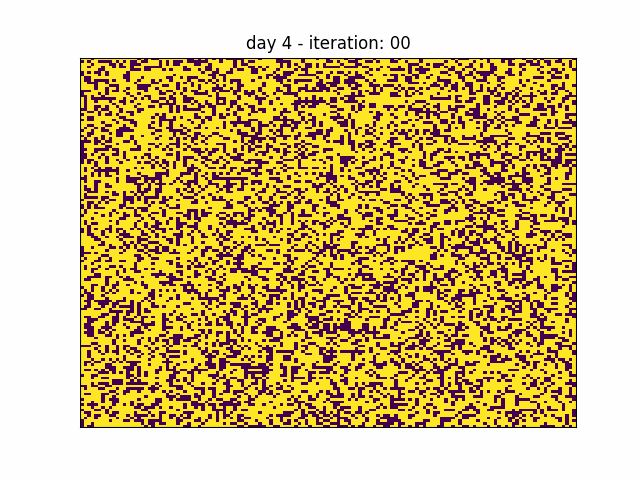

In [11]:
gif_path = create_gif(
    marked_grids,
    plot_str_grid,
    Path("day_4.gif"),
    frame_duration_ms=100,
    title="day 4",
    append_iteration=True,
)

embed_image(gif_path)

In [12]:
markdown(f"the total accessible rolls are: {current_accessible}")

the total accessible rolls are: 8946